# Customer segmentation using clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_excel(r"D:\AI\data\datasets-1\Wholesale customers data.xlsx")
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

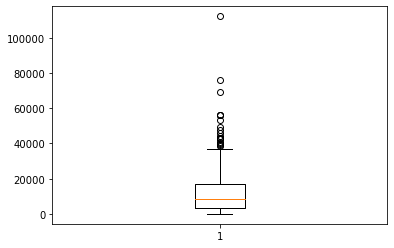

In [7]:
plt.boxplot(df.Fresh)
plt.show()

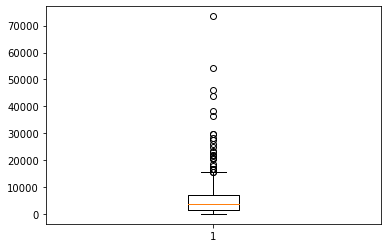

In [8]:
plt.boxplot(df.Milk)
plt.show()

In [12]:
df.Fresh[df.Fresh>45000] = 45000
df.Milk[df.Milk>20000] = 20000

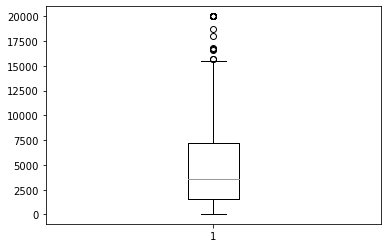

In [13]:
plt.boxplot(df.Milk)
plt.show()

In [14]:
df2 = df[['Fresh','Milk']]

# preprocessing of features

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = pd.DataFrame(sc.fit_transform(df2),columns=['Fresh','Milk'])
df2.head()

,Fresh,Milk
0,0.096954,0.883606
1,-0.417574,0.914608
2,-0.482120,0.712897
3,0.151597,-0.819461
4,1.008839,0.028852


## APply clustering

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=3)
model.fit(df2)

KMeans(n_clusters=3, random_state=3)

In [17]:
df2['cluster'] =model.labels_
df2.head(20)

,Fresh,Milk,cluster
0,0.096954,0.883606,1
1,-0.417574,0.914608,1
2,-0.482120,0.712897,0
3,0.151597,-0.819461,0
4,1.008839,0.028852,2
5,-0.201568,0.602379,0
6,0.047170,-0.416241,0
7,-0.369716,-0.062542,0
8,-0.517876,-0.325853,0
9,-0.513934,1.172886,1


In [18]:
pd.DataFrame(model.cluster_centers_,columns=['Fresh','Milk'])

,Fresh,Milk
0,-0.484764,-0.389586
1,-0.232892,1.880947
2,1.343882,-0.272945


In [19]:
pd.DataFrame(sc.inverse_transform(model.cluster_centers_),columns=['Fresh','Milk'])

,Fresh,Milk
0,6324.155894,3331.406844
1,9071.342857,14610.300000
2,26269.345794,3910.822430


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


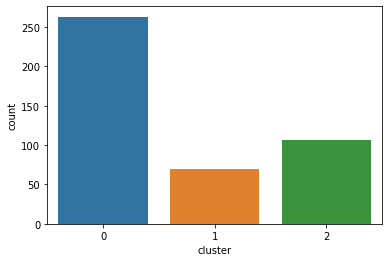

In [20]:
sns.countplot(df2.cluster)
plt.show()

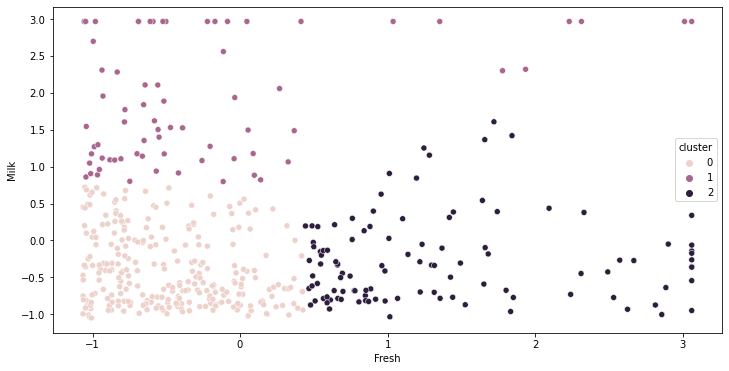

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Fresh',y="Milk",hue='cluster',data=df2)
plt.show()